# Gauge the quality of the clusters produced - Disaster corpus

TODO
- Implement Silhouette scoring against TF-IDF representations

In [1]:
import re
import json
import gensim

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem.porter import *
from lib import helper

# Define which stemmer to use in the pipeline later
stemmer = PorterStemmer()

# Useful flatten function from Alex Martelli on https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
flatten = lambda l: [item for sublist in l for item in sublist]

%matplotlib inline

In [2]:
from importlib import reload

c_v: 0.6385
c_npmi: 0.1114
Average document word count: 60.00030318780319
Number of documents: 23088
Latest record: 2020-06-25T20:18:00.0000000Z
Earliest record: 1970-01-01T01:00:00.0000000Z
Number of clusters: 54
Median cluster size: 346.0
Clustered docs: 100.0%

Best Performant (C_v)!
186    Hurricane warning: US face hurricanes three ti...
206    AIRT Puts Newly Released Pix4DReact to the Tes...
301    AIRT Puts Newly Released Pix4DReact to the Tes...
329    Universities including Oxford and Cambridge at...
Name: clean_text, dtype: object
80     Government should pay to rebuild houses with e...
136    Wildfire erupts near Reagan presidential libra...
153    Tsunami alert as huge 7.4-magnitude quake stri...
154    Tsunami warning: Britain could be hit by 0m wa...
Name: clean_text, dtype: object
27     New £26 million flood defences could be rolled...
151    Heartbreaking moment man feeds water to koala ...
227    EXCLUSIVE: Law firm linked to HIE boss paid £1...
243    Fears Angus fl

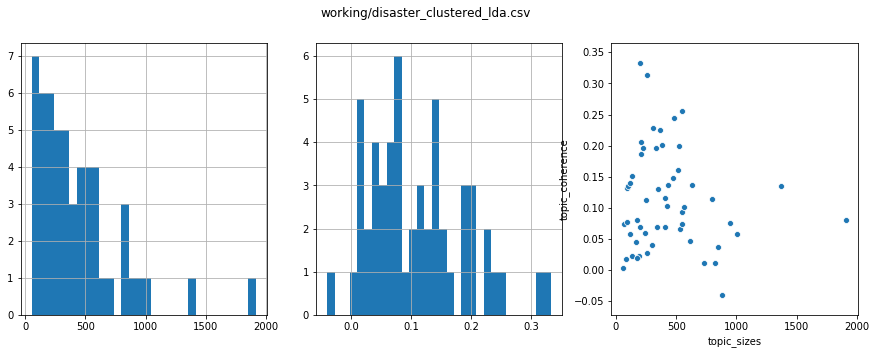

In [3]:
reload(helper)
coherence_models, topics_features = helper.report_corpus_model_coherence("working/disaster_clustered_lda.csv")

c_v: 0.5858
c_npmi: 0.0921
Average document word count: 60.00030318780319
Number of documents: 23088
Latest record: 2020-06-25T20:18:00.0000000Z
Earliest record: 1970-01-01T01:00:00.0000000Z
Number of clusters: 85
Median cluster size: 17.0
Clustered docs: 40.3%

Best Performant (C_v)!
1221    UK weather warning: Snow forecast as map shows...
2791    UK flood warning map – latest alerts for the E...
3301    Top tips on how to drive in floods and heavy r...
5401    What the Met Office says about heavy snow and ...
Name: clean_text, dtype: object
10607    The Coronavirus Budget: How will Covid-1 outbr...
10624    LIVE: Coronavirus outbreak all the latest brea...
13223    Coronavirus: How GPs are helping you prepare f...
13399    Coronavirus Outbreak: UK Death Toll Rises To 5...
Name: clean_text, dtype: object
1039    Two flood alerts on the River Mole as Environm...
1100    Two flood alerts on the River Mole as Environm...
8217    Flood alert issued in Brighton with more heavy...
8916    

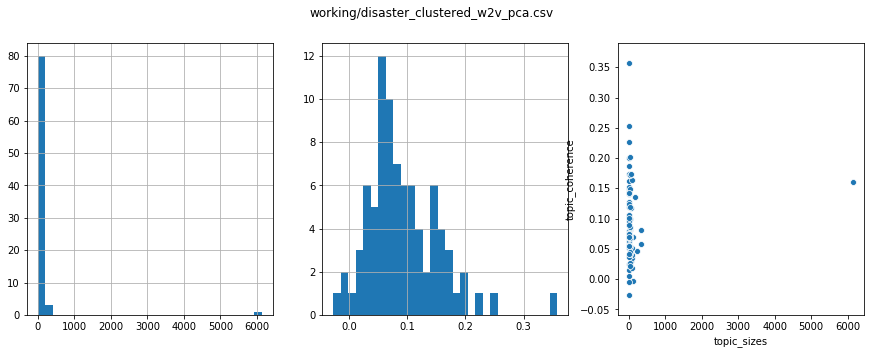

In [4]:
reload(helper)
coherence_models, topics_features = helper.report_corpus_model_coherence("working/disaster_clustered_w2v_pca.csv")

c_v: 0.6545
c_npmi: 0.1324
Average document word count: 60.185376985868515
Number of documents: 22786
Latest record: 2020-06-22T20:26:00.0000000Z
Earliest record: 1970-01-01T01:00:00.0000000Z
Number of clusters: 149
Median cluster size: 8.0
Clustered docs: 17.8%

Best Performant (C_v)!
5258     Pictures show conditions inside ;disease-ridde...
5259     Pictures show conditions inside farm claimed t...
5447     Pictures show conditions inside farm claimed t...
15577    The quietest times to shop at supermarkets inc...
Name: clean_text, dtype: object
936    ;Who scores the goals, it is absolutely not im...
938    Klopp insists he was unconcerned by Roberto Fi...
984    Jurgen Klopp values performances over goalscor...
988    Jurgen Klopp was unconcerned by Roberto Firmin...
Name: clean_text, dtype: object
16147    UN chief warns world faces misinformation epid...
16223    UN chief warns of ‘dangerous epidemic of misin...
16352    UN chief warns of ‘dangerous epidemic of misin...
16539   

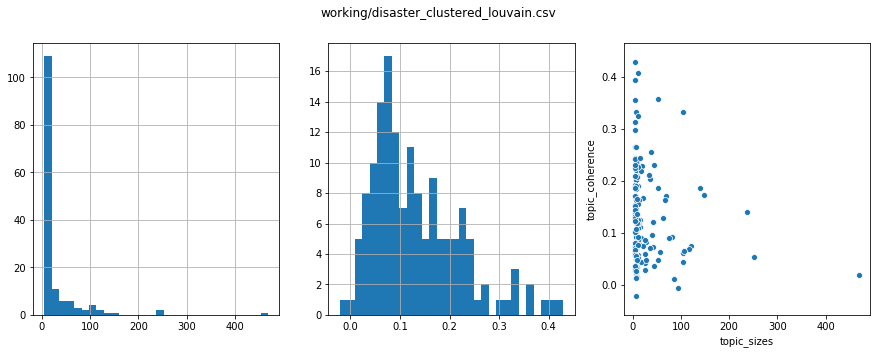

In [5]:
reload(helper)
coherence_models, topics_features = helper.report_corpus_model_coherence("working/disaster_clustered_louvain.csv")

c_v: 0.6497
c_npmi: 0.1113
Average document word count: 60.00030318780319
Number of documents: 23088
Latest record: 2020-06-25T20:18:00.0000000Z
Earliest record: 1970-01-01T01:00:00.0000000Z
Number of clusters: 37
Median cluster size: 215.0
Clustered docs: 61.8%

Best Performant (C_v)!
1    New flood warnings issued with more homes at r...
2    UK weather forecast – More than 100 flood aler...
3    UK flood warning map: Flood chaos to continue ...
8    UK weather: 66 flood warnings in place as ;cha...
Name: clean_text, dtype: object
0    West Midlands flood warnings prompt ;remain vi...
5    Flood warnings in place as groundwater levels ...
6    Motorists ignore road closure at North Bank as...
7    Latest on flood warnings and road closures in ...
Name: clean_text, dtype: object
0    West Midlands flood warnings prompt ;remain vi...
5    Flood warnings in place as groundwater levels ...
6    Motorists ignore road closure at North Bank as...
7    Latest on flood warnings and road closu

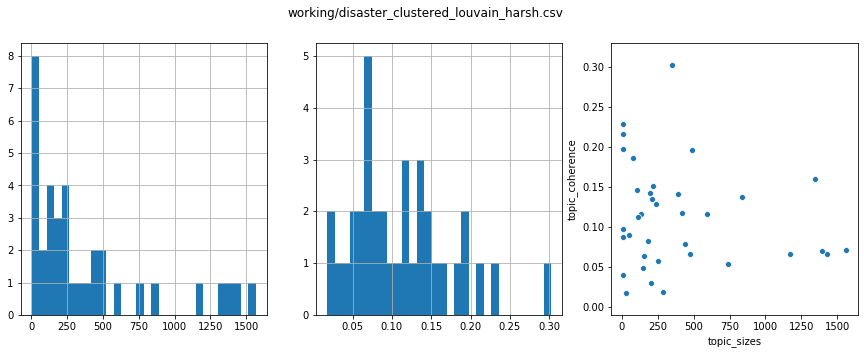

In [6]:
reload(helper)
coherence_models, topics_features = helper.report_corpus_model_coherence("working/disaster_clustered_louvain_harsh.csv")

c_v: 0.6411
c_npmi: 0.1157
Average document word count: 60.026607057597985
Number of documents: 23039
Latest record: 2020-06-25T09:22:00.0000000Z
Earliest record: 1970-01-01T01:00:00.0000000Z
Number of clusters: 293
Median cluster size: 7.0
Clustered docs: 13.4%

Best Performant (C_v)!
100     Heavy snow blankets Welsh hills as parts of Yo...
225     Heavy snow blankets Welsh hills as parts of Yo...
2499    Snow forecast today - MAPPED: Will it snow in ...
2505    Get ready for heavy snow as temperatures plumm...
Name: clean_text, dtype: object
0    West Midlands flood warnings prompt ;remain vi...
1    New flood warnings issued with more homes at r...
2    UK weather forecast – More than 100 flood aler...
3    UK flood warning map: Flood chaos to continue ...
Name: clean_text, dtype: object
5684     Coronavirus: Boris Johnson attacked over ‘sham...
10826    Liberal Democrats shelve spring conference due...
11665    Coronavirus: Boris Johnson to hold daily press...
14948    ‘Our story 

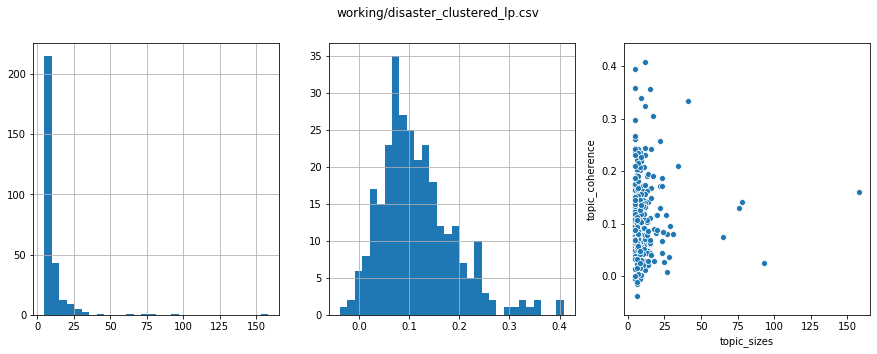

In [7]:
reload(helper)
coherence_models, topics_features = helper.report_corpus_model_coherence("working/disaster_clustered_lp.csv")

c_v: 0.6636
c_npmi: 0.1206
Average document word count: 60.00030318780319
Number of documents: 23088
Latest record: 2020-06-25T20:18:00.0000000Z
Earliest record: 1970-01-01T01:00:00.0000000Z
Number of clusters: 273
Median cluster size: 8.0
Clustered docs: 56.6%

Best Performant (C_v)!
267     Floods hit Worcestershire with roads closed an...
744     Floods hit Worcestershire with roads closed an...
8046    Severe winter flooding could become ;norm; acr...
9226    Kind-hearted strangers band together to help f...
Name: clean_text, dtype: object
5366     Herefordshire pupils chip in to help Australia...
5565     Herefordshire pupils chip in to help Australia...
8224     Herefordshire man loses all in floods but stil...
10400    Herefordshire farmer reveals flooding devastat...
Name: clean_text, dtype: object
5194    BAE Systems splashes out $2.2bn to buy Collins...
7262    BAE Systems - full year results in line with g...
7263    BAE Systems injects £1bn into pension fund aft...
7265    

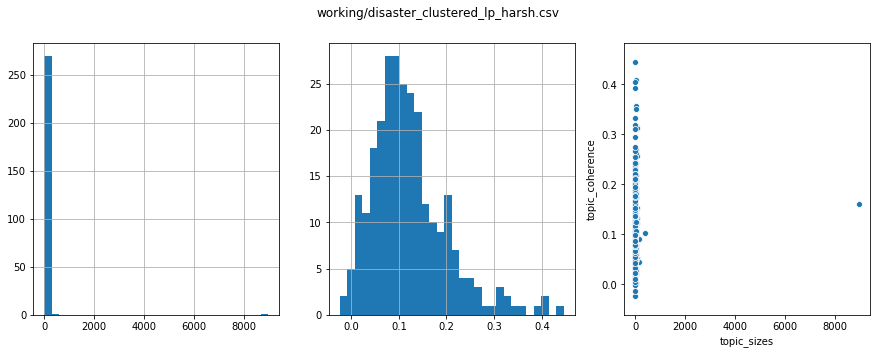

In [8]:
reload(helper)
coherence_models, topics_features = helper.report_corpus_model_coherence("working/disaster_clustered_lp_harsh.csv")